In [12]:
!pip install opencv-python pytesseract imutils
!apt-get install tesseract-ocr
!pip install pytesseract



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (25.9 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [13]:
import cv2
import pytesseract
import imutils
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


Saving WhatsApp Image 2024-08-31 at 10.21.06 AM.jpeg to WhatsApp Image 2024-08-31 at 10.21.06 AM.jpeg


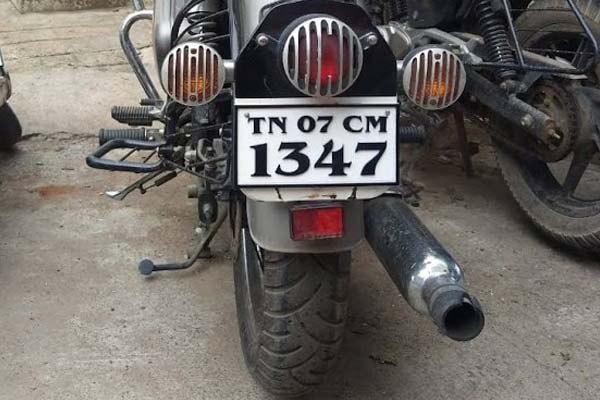

In [24]:
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
cv2_imshow(image)


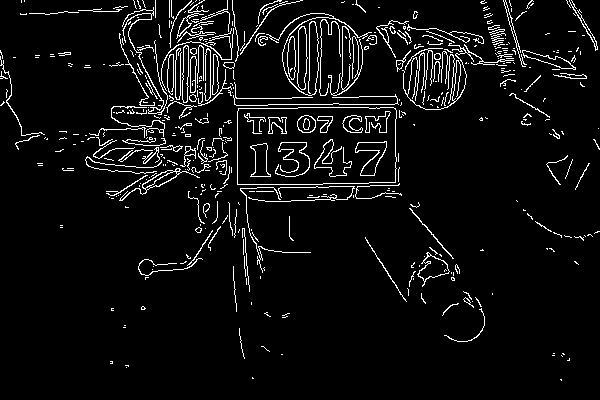

In [25]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(gray, 170, 200)
cv2_imshow(edged)


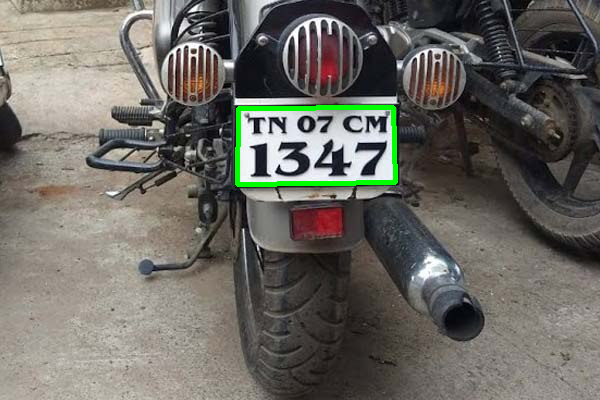

In [26]:
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    print("No contour detected")
else:
    cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)
    cv2_imshow(image)


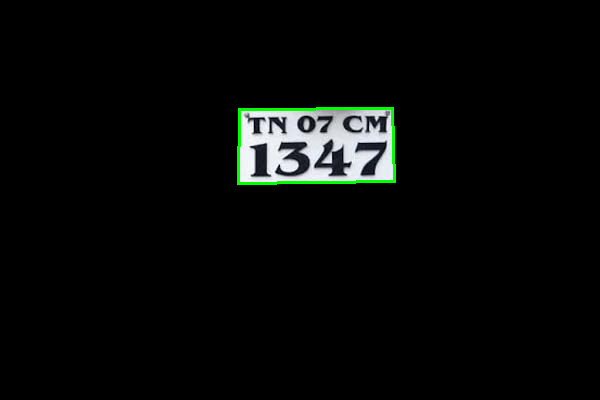

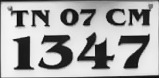

In [27]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [screenCnt], 0, 255, -1)
new_image = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(new_image)

(x, y) = np.where(mask == 255)
(topX, topY) = (np.min(x), np.min(y))
(bottomX, bottomY) = (np.max(x), np.max(y))
cropped = gray[topX:bottomX+1, topY:bottomY+1]
cv2_imshow(cropped)


In [28]:
number_plate_text = pytesseract.image_to_string(cropped, config='--psm 11')
print("Number plate detected:", number_plate_text.strip())


Number plate detected: TN 07 CM

1347
